In [15]:
import torch
import torchvision

In [16]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [17]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [18]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [19]:
#example_data = example_data.reshape(example_data.shape[0], 784)
example_data.shape

torch.Size([1000, 1, 28, 28])

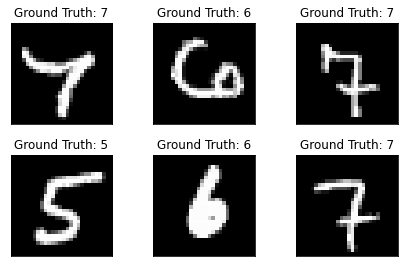

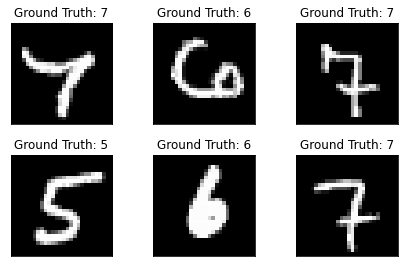

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [22]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, d_hidden, activation):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(784, d_hidden)
        self.linear2 = torch.nn.Linear(d_hidden, 10)
        self.activation = activation 
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return self.activation(x)

In [23]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.reshape(data.shape[0], 784)
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/model.pth')
            torch.save(optimizer.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/optimizer.pth')
    return loss.item()

In [24]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.reshape(data.shape[0], 784)
            data = data.cuda()
            target = target.cuda()
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [25]:
network = TwoLayerNet(100, F.log_softmax)
network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

test()
epoch = 1
loss = 9999999999
while epoch < n_epochs + 1 and loss > 0.11:
    loss = train(epoch)
    test()
    epoch += 1
    
print(f"finished training after {epoch} Epochs with a loss of {loss}")

<ipython-input-22-035343650298>:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
E:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3065, Accuracy: 1175/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326590
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.226409
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.158382
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.828573
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.836851
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.728793
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.588390
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.792392
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.572721
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.413901
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.275361
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.151459
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.090865
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.055331
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.140791
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.913666
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.033290
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.030198
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.987171
Train Epoch: 1 [12160

ValueError: x and y must be the same size

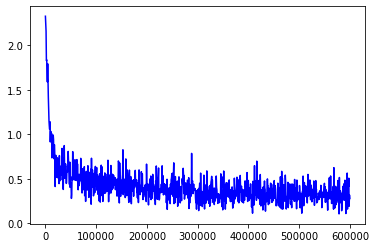

In [26]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

<ipython-input-22-035343650298>:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)



Test set: Avg. loss: 2.3134, Accuracy: 671/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327795
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.234826
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.120310
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.062574
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.880344
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.032764
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.931096
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.729810
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.569264
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.623831
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.319643
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.305753
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.620595
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.135784
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.243111
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.351604
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.267516
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.920453
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.273684
Train Epoch: 1 [12160/6

ValueError: x and y must be the same size

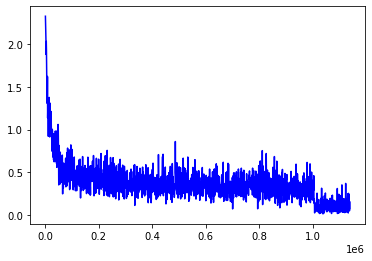

In [27]:
network = TwoLayerNet(32, F.log_softmax)
network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

test()
epoch = 1
loss = 9999999999
while epoch < n_epochs + 1 and loss > 0.11:
    loss = train(epoch)
    test()
    epoch += 1
    
print(f"finished training after {epoch} Epochs with a loss of {loss}")

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [45]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.reshape(data.shape[0], 784)
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/model.pth')
            torch.save(optimizer.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/optimizer.pth')
    return loss.item()

In [46]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.reshape(data.shape[0], 784)
            data = data.cuda()
            target = target.cuda()
            output = network(data)
            test_loss += F.cross_entropy(output, target)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

<ipython-input-22-035343650298>:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)



Test set: Avg. loss: 0.0023, Accuracy: 774/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302992
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300166
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.297726
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.293708
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.282434
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.294846
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.282931
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.279500
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.275451
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.260552
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.230844
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.232130
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.258734
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.183705
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.198869
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.173796
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.215237
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.177613
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.157229
Train Epoch: 1 [12160/6

TypeError: data type not understood

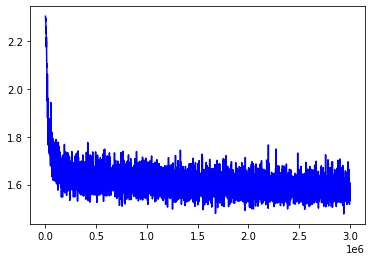

In [47]:
network = TwoLayerNet(32, F.softmax)
network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

test()
epoch = 1
loss = 9999999999
while epoch < n_epochs + 1 and loss > 0.11:
    new_loss = train(epoch)
    if new_loss < loss:
        loss = new_loss
    test()
    epoch += 1
    
print(f"finished training after {epoch} Epochs with a loss of {loss}")

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig